In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
customers = pd.read_csv('final_data/customers.csv', index_col=0)
orders_items = pd.read_csv("final_data/orders_items.csv", index_col=0)
orders = pd.read_csv("final_data/orders.csv", index_col=0)

In [3]:
orders_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,shipping_limit_date_1,price_2,freight_value_3
id,,,,,,,,,,
0,00010242-fe8c-5a6d-1ba2-dd792cb16214,1,4244733e-06e7-ecb4-970a-6e2683c13e61,48436dad-e18a-c8b2-bce0-89ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017-09-19 09:45:35,58.90,13.29
1,00018f77-f2f0-320c-5571-90d7a144bdd3,1,e5f2d52b-8021-89ee-6588-65ca93d83a8f,dd7ddc04-e1b6-c2c6-1435-2b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017-05-03 11:05:13,239.90,19.93
2,000229ec-3982-24ef-6ca0-657da4fc703e,1,c777355d-18b7-2b67-abbe-ef9df44fd0fd,5b51032e-ddd2-42ad-c84c-38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018-01-18 14:48:30,199.00,17.87
3,00024acb-cdf0-a6da-a1e9-31b038114c75,1,7634da15-2a46-10f1-595e-fa32f14722fc,9d7a1d34-a505-2409-0064-25275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018-08-15 10:10:18,12.99,12.79
4,00042b26-cf59-d7ce-69df-abb4e55b4fd9,1,ac6c3623-068f-30de-0304-5865e4e10089,df560393-f3a5-1e74-553a-b94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017-02-13 13:57:51,199.90,18.14


In [4]:
orders.dropna(inplace=True)
orders.reset_index(inplace=True)
orders = orders[orders['order_status']=='delivered']
orders_items.drop(columns=['shipping_limit_date_1', 'price_2', 'freight_value_3'], inplace=True)
orders_items.columns = ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']
orders_items.dropna(inplace=True)
orders_items.reset_index(inplace=True)

In [5]:
orders_items['total_payment'] = orders_items['price'] + orders_items['freight_value']

In [6]:
df_abcdx = (
    customers
    .merge(orders, on='customer_id', how='inner')
    .merge(orders_items, on='order_id', how='inner')
).groupby('customer_unique_id').agg(
    total_revenue=('total_payment','sum'),
    n_orders=('customer_id', 'nunique')).sort_values(by='n_orders', ascending=False).reset_index()

df_abcdx.head()

,customer_unique_id,total_revenue,n_orders
0,8d50f5ea-df50-201c-cdce-dfb9e2ac8455,879.27,15
1,3e43e610-5506-432c-953e-165fb2acf44c,1172.67,9
2,1b6c7548-a2a1-f903-7c1f-d3ddfed95f33,959.01,7
3,ca77025e-7201-e3b3-0c44-b472ff346268,1122.72,7
4,6469f99c-1f9d-fae7-733b-25662e7f1782,758.83,7


In [7]:
df_abcdx['rev_cum_sum'] = df_abcdx['total_revenue'].cumsum()
df_abcdx['rev_all'] = df_abcdx['total_revenue'].sum()
df_abcdx['rev_percent'] = df_abcdx['rev_cum_sum'] / df_abcdx['rev_all']
df_abcdx.tail()

,customer_unique_id,total_revenue,n_orders,rev_cum_sum,rev_all,rev_percent
93331,5657dfeb-ff58-68c4-dc7e-8355fea865c4,105.38,1,1.541583e+07,15416246.25,0.999973
93332,5657596a-ddb4-d7b0-7b32-cd330614bdf8,189.26,1,1.541602e+07,15416246.25,0.999985
93333,5656eb16-9546-146c-aeab-56c3ffc3d268,128.87,1,1.541615e+07,15416246.25,0.999994
93334,5656a8fa-bc86-29ff-96b2-bc14f8c09a27,28.13,1,1.541617e+07,15416246.25,0.999995
93335,ffffd265-7e2a-ad29-07e6-7c3e9daecbeb,71.56,1,1.541625e+07,15416246.25,1.000000


In [8]:
def condition_abcdx(x):
    if x > 0 and x <= 0.60:
        return "A"
    elif x > 0.60 and x <= 0.85:
        return "B"
    elif x > 0.85 and x <= 0.95:
        return "C"
    elif x > 0.95 and x <= 0.99:
        return "D"
    else:
        return "X"

df_abcdx['ABCDX'] = df_abcdx['rev_percent'].apply(condition_abcdx)
df_abcdx.tail()

,customer_unique_id,total_revenue,n_orders,rev_cum_sum,rev_all,rev_percent,ABCDX
93331,5657dfeb-ff58-68c4-dc7e-8355fea865c4,105.38,1,1.541583e+07,15416246.25,0.999973,X
93332,5657596a-ddb4-d7b0-7b32-cd330614bdf8,189.26,1,1.541602e+07,15416246.25,0.999985,X
93333,5656eb16-9546-146c-aeab-56c3ffc3d268,128.87,1,1.541615e+07,15416246.25,0.999994,X
93334,5656a8fa-bc86-29ff-96b2-bc14f8c09a27,28.13,1,1.541617e+07,15416246.25,0.999995,X
93335,ffffd265-7e2a-ad29-07e6-7c3e9daecbeb,71.56,1,1.541625e+07,15416246.25,1.000000,X


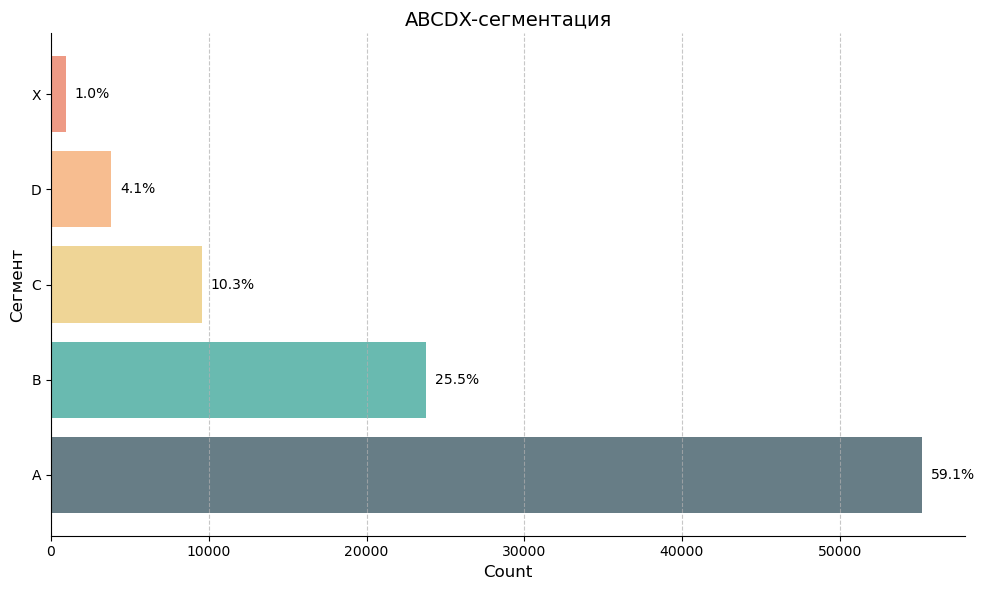

In [9]:
value_counts = df_abcdx['ABCDX'].value_counts()
total = value_counts.sum()
percentages = (value_counts.values / total) * 100

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(
    y=value_counts.index,
    width=value_counts.values,
    color=['#264653', '#2A9D8F', '#E9C46A', '#F4A261', '#E76F51'],
    alpha=0.7
)

for bar, percent in zip(bars, percentages):
    width = bar.get_width()
    ax.text(
        x=width + (0.01 * max(value_counts.values)), 
        y=bar.get_y() + bar.get_height()/2,          
        s=f'{percent:.1f}%',                       
        va='center',                                 
        ha='left',
        fontsize=10
    )

ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Сегмент', fontsize=12)
ax.set_title('ABCDX-сегментация', fontsize=14)
ax.grid(axis='x', linestyle='--', alpha=0.7)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

In [10]:
df_abcdx.loc[df_abcdx['ABCDX']=='A', 'total_revenue'].sum() / df_abcdx['total_revenue'].sum()

0.599998729262644

**Сегментация по пользователям, совершившим более одного заказа**

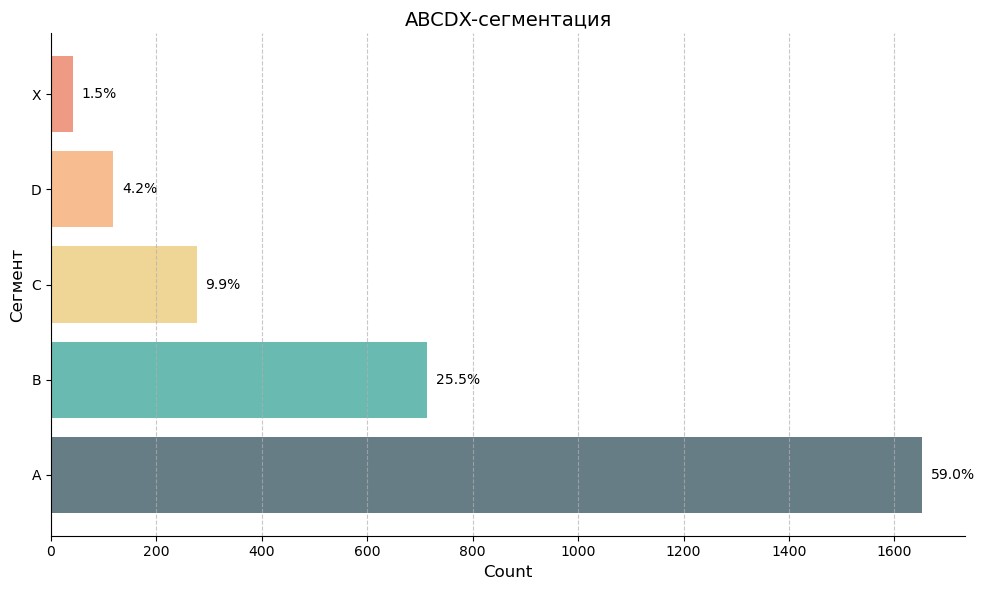

In [11]:
df_abcdx = (
    customers
    .merge(orders, on='customer_id', how='inner')
    .merge(orders_items, on='order_id', how='inner')
).groupby('customer_unique_id').agg(
    total_revenue=('total_payment','sum'),
    n_orders=('customer_id', 'nunique')).sort_values(by='n_orders', ascending=False).reset_index()

df_abcdx = df_abcdx[df_abcdx['n_orders']>1]
df_abcdx['rev_cum_sum'] = df_abcdx['total_revenue'].cumsum()
df_abcdx['rev_all'] = df_abcdx['total_revenue'].sum()
df_abcdx['rev_percent'] = df_abcdx['rev_cum_sum'] / df_abcdx['rev_all']
df_abcdx['ABCDX'] = df_abcdx['rev_percent'].apply(condition_abcdx)

value_counts = df_abcdx['ABCDX'].value_counts()
total = value_counts.sum()
percentages = (value_counts.values / total) * 100

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(
    y=value_counts.index,
    width=value_counts.values,
    color=['#264653', '#2A9D8F', '#E9C46A', '#F4A261', '#E76F51'],
    alpha=0.7
)

for bar, percent in zip(bars, percentages):
    width = bar.get_width()
    ax.text(
        x=width + (0.01 * max(value_counts.values)), 
        y=bar.get_y() + bar.get_height()/2,          
        s=f'{percent:.1f}%',                       
        va='center',                                 
        ha='left',
        fontsize=10
    )

ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Сегмент', fontsize=12)
ax.set_title('ABCDX-сегментация', fontsize=14)
ax.grid(axis='x', linestyle='--', alpha=0.7)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()